Epoch 1/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 73s 175ms/step - accuracy: 0.6871 - loss: 0.5561 - val_accuracy: 0.8306 - val_loss: 0.3844
Epoch 2/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.8894 - loss: 0.2812 - val_accuracy: 0.8450 - val_loss: 0.3791
Epoch 3/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 81s 177ms/step - accuracy: 0.9149 - loss: 0.2274 - val_accuracy: 0.8419 - val_loss: 0.3655
Epoch 4/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 76s 161ms/step - accuracy: 0.8872 - loss: 0.2763 - val_accuracy: 0.8447 - val_loss: 0.3901
Epoch 5/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 89s 179ms/step - accuracy: 0.9413 - loss: 0.1642 - val_accuracy: 0.8359 - val_loss: 0.4519
Epoch 6/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 175ms/step - accuracy: 0.9589 - loss: 0.1264 - val_accuracy: 0.8364 - val_loss: 0.4687
Epoch 7/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 83s 178ms/step - accuracy: 0.9441 - loss: 0.1597 - val_accuracy: 0.8327 - val_loss: 0.5009
Epoch 8/8
391/391 ━━━━━━━━━━━━━━━━━━━━ 80s 172ms/step - accuracy: 0.9770 - loss: 0.0786 - 

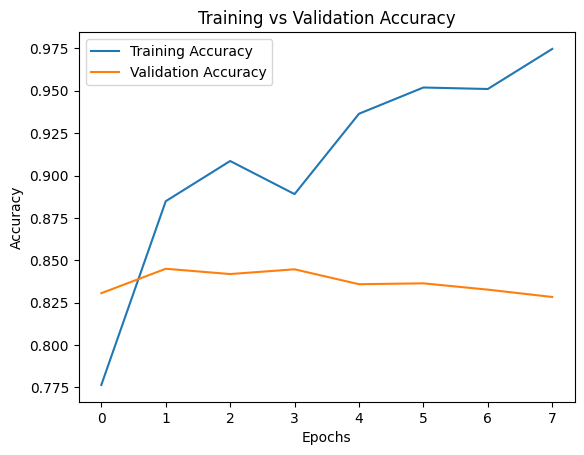

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 398ms/step
Sentiment Score: 0.2610
Negative


In [7]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

# Load IMDb dataset (top 10,000 words only)
vocab_size = 10000
max_length = 100
embedding_dim = 32

(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=vocab_size)

# Pad sequences to ensure uniform input size
x_train = pad_sequences(x_train, maxlen=max_length, padding='post')
x_test = pad_sequences(x_test, maxlen=max_length, padding='post')

# Build RNN model with LSTM
model = keras.Sequential([
    keras.layers.Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_length),
    keras.layers.LSTM(64, return_sequences=True),  # LSTM layer
    keras.layers.LSTM(32),
    keras.layers.Dense(1, activation='sigmoid')  # Output layer (binary classification)
])

# Compile the model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=8, batch_size=64, validation_data=(x_test, y_test))

# Evaluate model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc:.4f}")

# Plot training history
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Training vs Validation Accuracy")
plt.show()

# Function to predict sentiment for custom text
def predict_sentiment(text):
    word_index = imdb.get_word_index()
    words = text.lower().split()
    sequence = [word_index.get(word, 0) for word in words]  # Convert words to indices
    sequence = pad_sequences([sequence], maxlen=max_length, padding='post')
    prediction = model.predict(sequence)[0][0]
    print(f"Sentiment Score: {prediction:.4f}")
    print("Positive" if prediction > 0.5 else "Negative")

# Test the model with a sample review
sample_review = "This movie was absolutely amazing, the story was fantastic!"
predict_sentiment(sample_review)